In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C://Users/naikp/Downloads/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
#Logistic 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
logistic_pred = classifier.predict(X_test)
logistic = accuracy_score(y_test, logistic_pred)
logistic

C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7987012987012987

In [7]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators= 100, criterion='gini') # gini/entropy
classifier2.fit(X_train, y_train)
RF_pred = classifier2.predict(X_test)
RF = accuracy_score(y_test, RF_pred)
RF

0.7857142857142857

In [8]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier3 = DecisionTreeClassifier(criterion='gini', random_state=0)   #entropy/gini
classifier3.fit(X_train, y_train)
DT_pred = classifier.predict(X_test)
DT = accuracy_score(y_test, DT_pred)
DT

0.7987012987012987

In [9]:
#SVC
from sklearn.svm import SVC
classifier4 = SVC(kernel='rbf', random_state=0)  #kernal= linear/poly/rbf/sigmoid/precomputed
classifier4.fit(X_train, y_train)
svc_pred = classifier2.predict(X_test)
SVC = accuracy_score(y_test, svc_pred)
SVC

0.7857142857142857

In [10]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 20)
knc.fit(X_train, y_train)
knc_pred = knc.predict(X_test)
KNN = accuracy_score(y_test, knc_pred)
KNN

0.7987012987012987

In [11]:
#Naive Bias
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)
nbc_pred = nbc.predict(X_test)
NaiveBias = accuracy_score(y_test, nbc_pred)
NaiveBias

0.7662337662337663

In [12]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.27959399, 0.19683241, 0.13786826, 0.10540616, 0.10522074,
       0.07552989, 0.0529602 , 0.04658836])

In [13]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [14]:
#Logistic PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
pca_classifier = LogisticRegression()
pca_classifier.fit(X_train, y_train)
pca_logistic_pred = pca_classifier.predict(X_test)
pca_logistic = accuracy_score(y_test, logistic_pred)
pca_logistic

C:\Users\naikp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7987012987012987

In [15]:
#Random forest PCA
from sklearn.ensemble import RandomForestClassifier
pca_classifier2 = RandomForestClassifier(n_estimators= 200, criterion='entropy') # gini/entropy
pca_classifier2.fit(X_train, y_train)
pca_RF_pred = pca_classifier2.predict(X_test)
pca_RF = accuracy_score(y_test, RF_pred)
pca_RF

0.7857142857142857

In [16]:
#Naive Bias PCA
from sklearn.naive_bayes import GaussianNB
pca_nbc = GaussianNB()
pca_nbc.fit(X_train, y_train)
pca_nbc_pred = pca_nbc.predict(X_test)
pca_NaiveBias = accuracy_score(y_test, nbc_pred)
pca_NaiveBias

0.7662337662337663

In [17]:
data = [logistic, RF, DT, SVC, KNN, NaiveBias, pca_logistic, pca_RF, pca_NaiveBias]
index = ['logistic', 'RF', 'DT', 'SVC', 'KNN', 'NaiveBias', 'pca_logistic', 'pca_RF', 'pca_NaiveBias']

In [18]:
result = pd.DataFrame(data, index, ['efficiency'])
result

,efficiency
logistic,0.798701
RF,0.785714
DT,0.798701
SVC,0.785714
KNN,0.798701
NaiveBias,0.766234
pca_logistic,0.798701
pca_RF,0.785714
pca_NaiveBias,0.766234


<IPython.core.display.Javascript object>


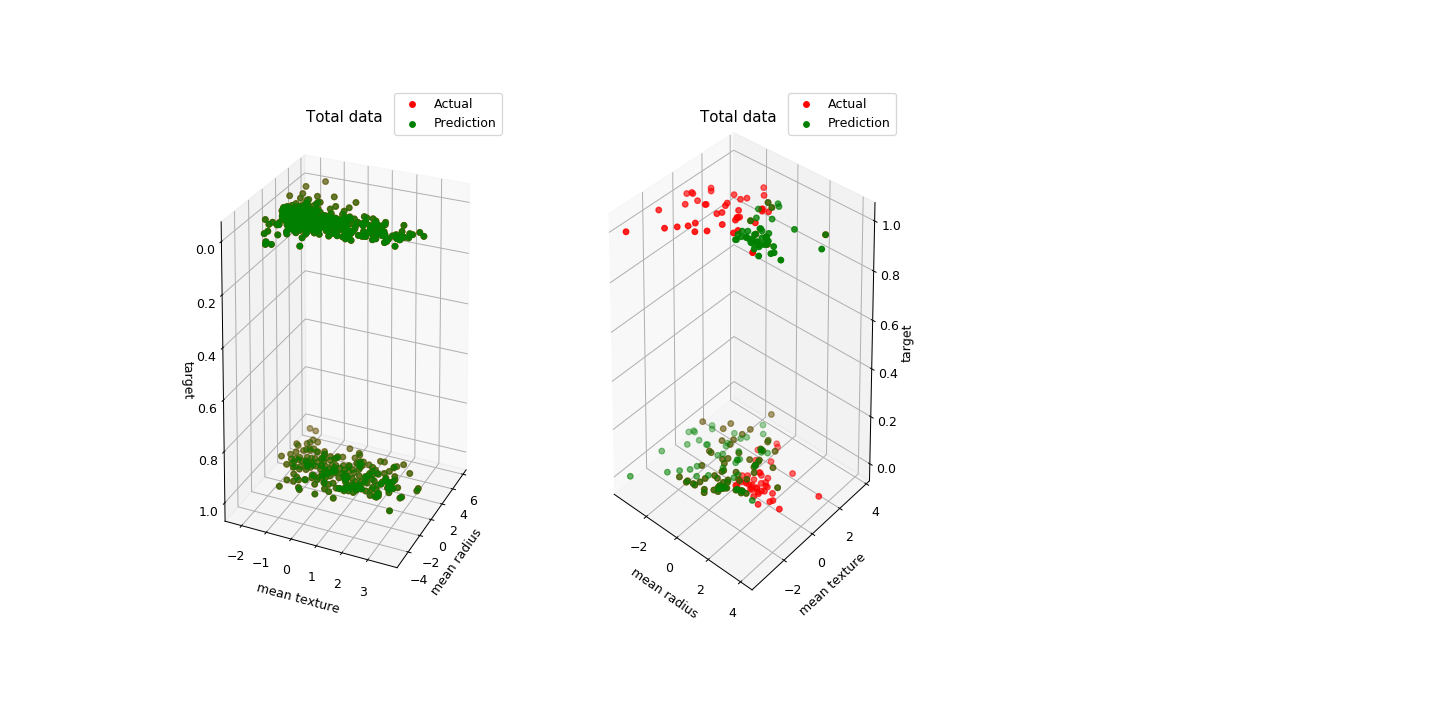

In [20]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d

fig=plt.figure(figsize=(16,8))
ax0 = fig.add_subplot(131, projection='3d')
ax1 = fig.add_subplot(132, projection='3d')

#train data
ax0.scatter(X_train[:,0], X_train[:,1], y_train, color='r', label='Actual')
ax0.scatter(X_train[:,0], X_train[:,1], pca_classifier2.predict(X_train), color='g', label='Prediction')
ax0.set_xlabel('mean radius')
ax0.set_ylabel('mean texture')
ax0.set_zlabel('target')
ax0.set_title('Total data')
ax0.legend()
#test data
ax1.scatter(X_test[:,0], X_test[:,1], y_test, color='r', label='Actual')
ax1.scatter(X_test[:,0], X_test[:,1], pca_classifier2.predict(X_test), color='g', label='Prediction')
ax1.set_xlabel('mean radius')
ax1.set_ylabel('mean texture')
ax1.set_zlabel('target')
ax1.set_title('Total data')
ax1.legend()